In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,close_pred
0,300,296,312,0.00,108,291,36.0
1,296,284,301,2875.34,97,287,35.0
2,301,290,309,2757.18,106,293,35.0
3,290,297,307,2726.45,150,283,36.0
4,278,282,293,2809.01,104,272,34.0


In [ ]:
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

Checking Unique Value count in data["Close"]

In [ ]:
print(len(data['Close']))
print(len(data['Close'].unique()))

1556
1529


In [ ]:
import math

Converteing data["Close"] to a catogorical data

In [ ]:
data['close_pred'] = pd.Series(dtype='int')
for i in range(len(data)):
  data["close_pred"][i] = math.ceil(data["Close"][i]/80)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
 7   close_pred  1556 non-null   float64
dtypes: float64(5), object(3)
memory usage: 97.4+ KB


In [ ]:
len(data["close_pred"].unique())

36

Shifting Close by 1 to add it as a feature which influences the "Close_pred" of the upcoming day

In [ ]:
data["Close"] = data["Close"].shift(1)
data['Close']=data['Close'].fillna(0)

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,close_pred
0,300,296,312,0.00,108,291,36.0
1,296,284,301,2875.34,97,287,35.0
2,301,290,309,2757.18,106,293,35.0
3,290,297,307,2726.45,150,283,36.0
4,278,282,293,2809.01,104,272,34.0


Converting "Voume" & "Market Cap" from "Object" type to "float" type.

In [ ]:
data["Market Cap"] = [float(str(i).replace(",", "")) for i in data["Market Cap"]]
data["Volume"] = [str(i).replace(",", "") for i in data["Volume"]]

In [ ]:
data["Volume"] = [str(i).replace("-", "0") for i in data["Volume"]]
data["Volume"] = [float(str(i).replace(",", "")) for i in data["Volume"]]

In [ ]:
data = data.drop(columns=["Date"])


In [ ]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,close_pred
0,300,296,312,0.00,108,291,36.0
1,296,284,301,2875.34,97,287,35.0
2,301,290,309,2757.18,106,293,35.0
3,290,297,307,2726.45,150,283,36.0
4,278,282,293,2809.01,104,272,34.0


Converting "High", "Low","Open", "Volume", "Market Cap" into categorical data with n_nins = 600

In [ ]:
from sklearn.preprocessing import LabelEncoder

n_bins = 600
label_encoder = LabelEncoder()

data["Open"] = label_encoder.fit_transform(pd.cut(data['Open'], n_bins, retbins=True)[0])

In [ ]:
len(data["Open"].unique())

307

In [ ]:
data["High"] = label_encoder.fit_transform(pd.cut(data['High'], n_bins, retbins=True)[0])
data["Low"] = label_encoder.fit_transform(pd.cut(data['Low'], n_bins, retbins=True)[0])
data["Volume"] = label_encoder.fit_transform(pd.cut(data['Volume'], n_bins, retbins=True)[0])
data["Market Cap"] = label_encoder.fit_transform(pd.cut(data['Market Cap'], n_bins, retbins=True)[0])

In [ ]:
print(len(data["High"].unique()))
print(len(data["Low"].unique()))
print(len(data["Volume"].unique()))
print(len(data["Market Cap"].unique()))

302
316
175
299


Split the data into test & train

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC

Y = data.close_pred.astype('int')
X_data = data.drop(columns = ["Volume"])
X = X_data
user_prompt = 0.3
user_enable = False
x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

In [ ]:
y_df = pd.DataFrame(y_test, columns = ['tst'])
y_ts = []
for i in range(len(y_df)):
   k = (y_df['tst'][i]*80)
   y_ts.append(k)
len(y_ts)

467

Plot of Y_test


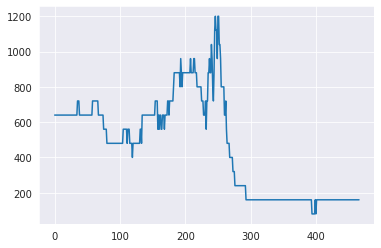

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = range(467)
y = y_ts
plt.plot(x,y)
plt.show()

#1) Decision Tree Classifier

In [ ]:
decision_model = DTC()
decision_model.fit(x_train,y_train)
decision_pred = decision_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
inbuilt_acc_decision = acc(y_test,decision_pred)
print("Accuracy for Descision Tree-based =>", str(inbuilt_acc_decision*100)+"%")

Accuracy for Descision Tree-based => 62.74089935760171%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, decision_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       168
           3       0.09      1.00      0.16        17
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3

    accuracy                           0.63       467
   macro avg       0.81      0.87      0.81       467
weighted avg       0.59   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y1 = []
for i in range(len(decision_pred)):
   k = (decision_pred[i]*80)
   y1.append(k)
len(y1)

467

PLot of Y_test & Predicted Y for DTC

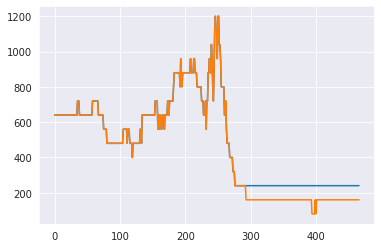

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = range(467)
y = y1
y2 = y_ts
plt.plot(x,y,y2)
plt.show()

#2) XGB

In [ ]:
from xgboost import XGBClassifier as xgb

mod = xgb()
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)

In [ ]:
accr = acc(y_test,y_pred)
print(accr*100)

61.88436830835118


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       168
           3       0.09      1.00      0.16        17
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        32
          10       0.84      1.00      0.91        16
          11       1.00      0.88      0.94        34
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3

    accuracy                           0.62       467
   macro avg       0.79      0.86      0.80       467
weighted avg       0.59   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y2 = []
for i in range(len(y_pred)):
   k = (y_pred[i]*80)
   y2.append(k)
len(y2)

467

PLot of Y_test & Predicted Y for XGB

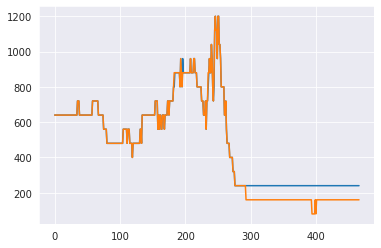

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = range(467)
y = y2
y_2 = y_ts
plt.plot(x,y,y_2)
plt.show()

#3) LightGBM

In [ ]:
from lightgbm import LGBMClassifier as lgb
mod1 = lgb()
mod1.fit(x_train,y_train) 
y_pred1 = mod1.predict(x_test)

In [ ]:
accr2 = acc(y_test,y_pred1)
print(accr2*100)

62.74089935760171


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       168
           3       0.09      1.00      0.16        17
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3

    accuracy                           0.63       467
   macro avg       0.81      0.87      0.81       467
weighted avg       0.59   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y3 = []
for i in range(len(y_pred1)):
   k = (y_pred1[i]*80)
   y3.append(k)
len(y3)

467

PLot of Y_test & Predicted Y for LightGBM

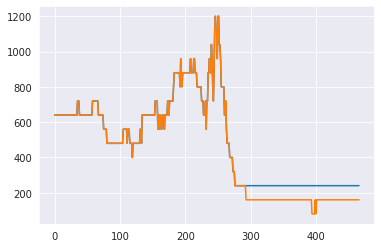

In [ ]:
x = range(467)
y = y3
y_2 = y_ts
plt.plot(x,y,y_2)
plt.show()

#4) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [ ]:
rf = rfc()
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

In [ ]:
accr3 = acc(y_test,y_pred2)
print(accr3*100)

61.45610278372591


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00       168
           3       0.09      1.00      0.16        17
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        46
           7       1.00      0.87      0.93        23
           8       0.97      1.00      0.99        99
           9       1.00      1.00      1.00        32
          10       1.00      0.94      0.97        16
          11       0.94      0.97      0.96        34
          12       0.88      0.88      0.88         8
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3

    accuracy                           0.61       467
   macro avg       0.79      0.84      0.79       467
weighted avg       0.58   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y4 = []
for i in range(len(y_pred2)):
   k = (y_pred2[i]*80)
   y4.append(k)
len(y4)

467

PLot of Y_test & Predicted Y for Random Forest

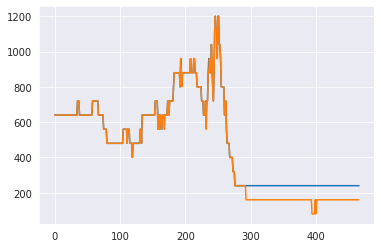

In [ ]:
x = range(467)
y = y4
y_2 = y_ts
plt.plot(x,y,y_2)
plt.show()